In [1]:
import pandas as pd
import numpy as np
import os 
from sklearn.feature_selection import chi2
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt


<AxesSubplot:>

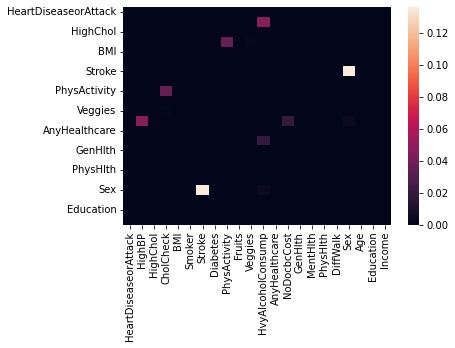

In [63]:
studentdf = pd.read_csv("../heart_disease_health_indicators_BRFSS2015.csv")
######### Chi Square testing Matrix ###########
## Testing association bewteen indepnedent variables######


column_names=studentdf.columns

chisqmatrix=pd.DataFrame(studentdf,columns=column_names,index=column_names)

outercnt=0
innercnt=0
for icol in column_names:
    
    for jcol in column_names:
        
        mycrosstab=pd.crosstab(studentdf[icol],studentdf[jcol])
       #print (mycrosstab)
        stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
        chisqmatrix.iloc[outercnt,innercnt]=round(p,3)
        cntexpected=expected[expected<5].size
        perexpected=((expected.size-cntexpected)/expected.size)*100
      
       #print (icol)
       #print (jcol)
        if perexpected<20:
            chisqmatrix.iloc[outercnt,innercnt]=0.0001
       #print (perexpected) 
        if icol==jcol:
            chisqmatrix.iloc[outercnt,innercnt]=0.00
       #print (expected) 
        innercnt=innercnt+1
    #print (outercnt) 
    outercnt=outercnt+1
    innercnt=0
    


sns.heatmap(chisqmatrix)


In [48]:
#pointbiserialr

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
HighBP,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
HighChol,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
CholCheck,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.036,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
BMI,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
Smoker,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
Stroke,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.136,0.0,0.0,0.0
Diabetes,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
PhysActivity,0.0,0.000,0.0,0.036,0.0,0.0,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
Fruits,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


In [3]:
from sklearn.feature_selection import chi2,SelectKBest
df = pd.read_csv("../heart_disease_health_indicators_BRFSS2015.csv")
X=df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']

cs = SelectKBest()
cs.fit(X,y)
feature_score = pd.DataFrame({"Score":cs.scores_,"P_Value":cs.pvalues_},index=X.columns)

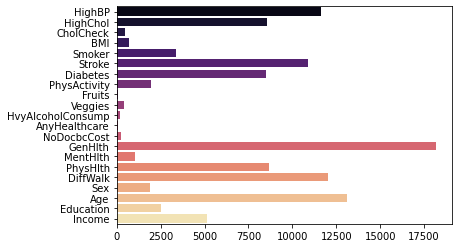

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
danex = ['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

daney = cs.scores_
sns.barplot(x = daney,y=danex, palette = 'magma')

plt.savefig('../Plots/SelectKBest.png')

In [6]:
chi2(X,y)[0]

array([6.34912591e+03, 4.77362075e+03, 1.85058348e+01, 1.09256806e+03,
       1.85001359e+03, 1.00299678e+04, 1.35334265e+04, 4.70679946e+02,
       3.63388005e+01, 7.33891368e+01, 2.01223900e+02, 4.35799120e+00,
       2.23261033e+02, 7.69892085e+03, 1.82779490e+04, 1.50048810e+05,
       9.54691891e+03, 1.05237326e+03, 1.44698407e+04, 4.84204323e+02,
       3.57421412e+03])

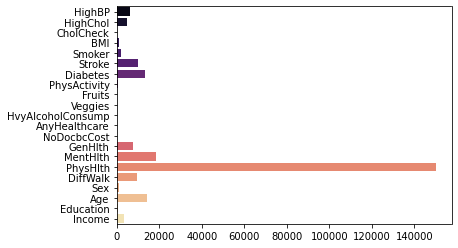

In [9]:
danex = ['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

daney = chi2(X,y)[0]#chi2 scores
sns.barplot(x = daney,y=danex, palette = 'magma')

plt.savefig('../Plots/chi2FeatureSelection.png')

In [10]:
chi2(X,y)

(array([6.34912591e+03, 4.77362075e+03, 1.85058348e+01, 1.09256806e+03,
        1.85001359e+03, 1.00299678e+04, 1.35334265e+04, 4.70679946e+02,
        3.63388005e+01, 7.33891368e+01, 2.01223900e+02, 4.35799120e+00,
        2.23261033e+02, 7.69892085e+03, 1.82779490e+04, 1.50048810e+05,
        9.54691891e+03, 1.05237326e+03, 1.44698407e+04, 4.84204323e+02,
        3.57421412e+03]),
 array([0.00000000e+000, 0.00000000e+000, 1.69384950e-005, 1.36200667e-239,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.27933252e-104,
        1.65829385e-009, 1.06450354e-017, 1.12915456e-045, 3.68357173e-002,
        1.75829726e-050, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 7.42152191e-231, 0.00000000e+000, 2.59956473e-107,
        0.00000000e+000]))

In [62]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                shuffle = True,stratify=y,
                                                 random_state=0)#parametr dla zachowania proporcji

In [7]:
data_fr = pd.DataFrame(X_train,columns = X_train.columns)
from pandas.plotting import scatter_matrix

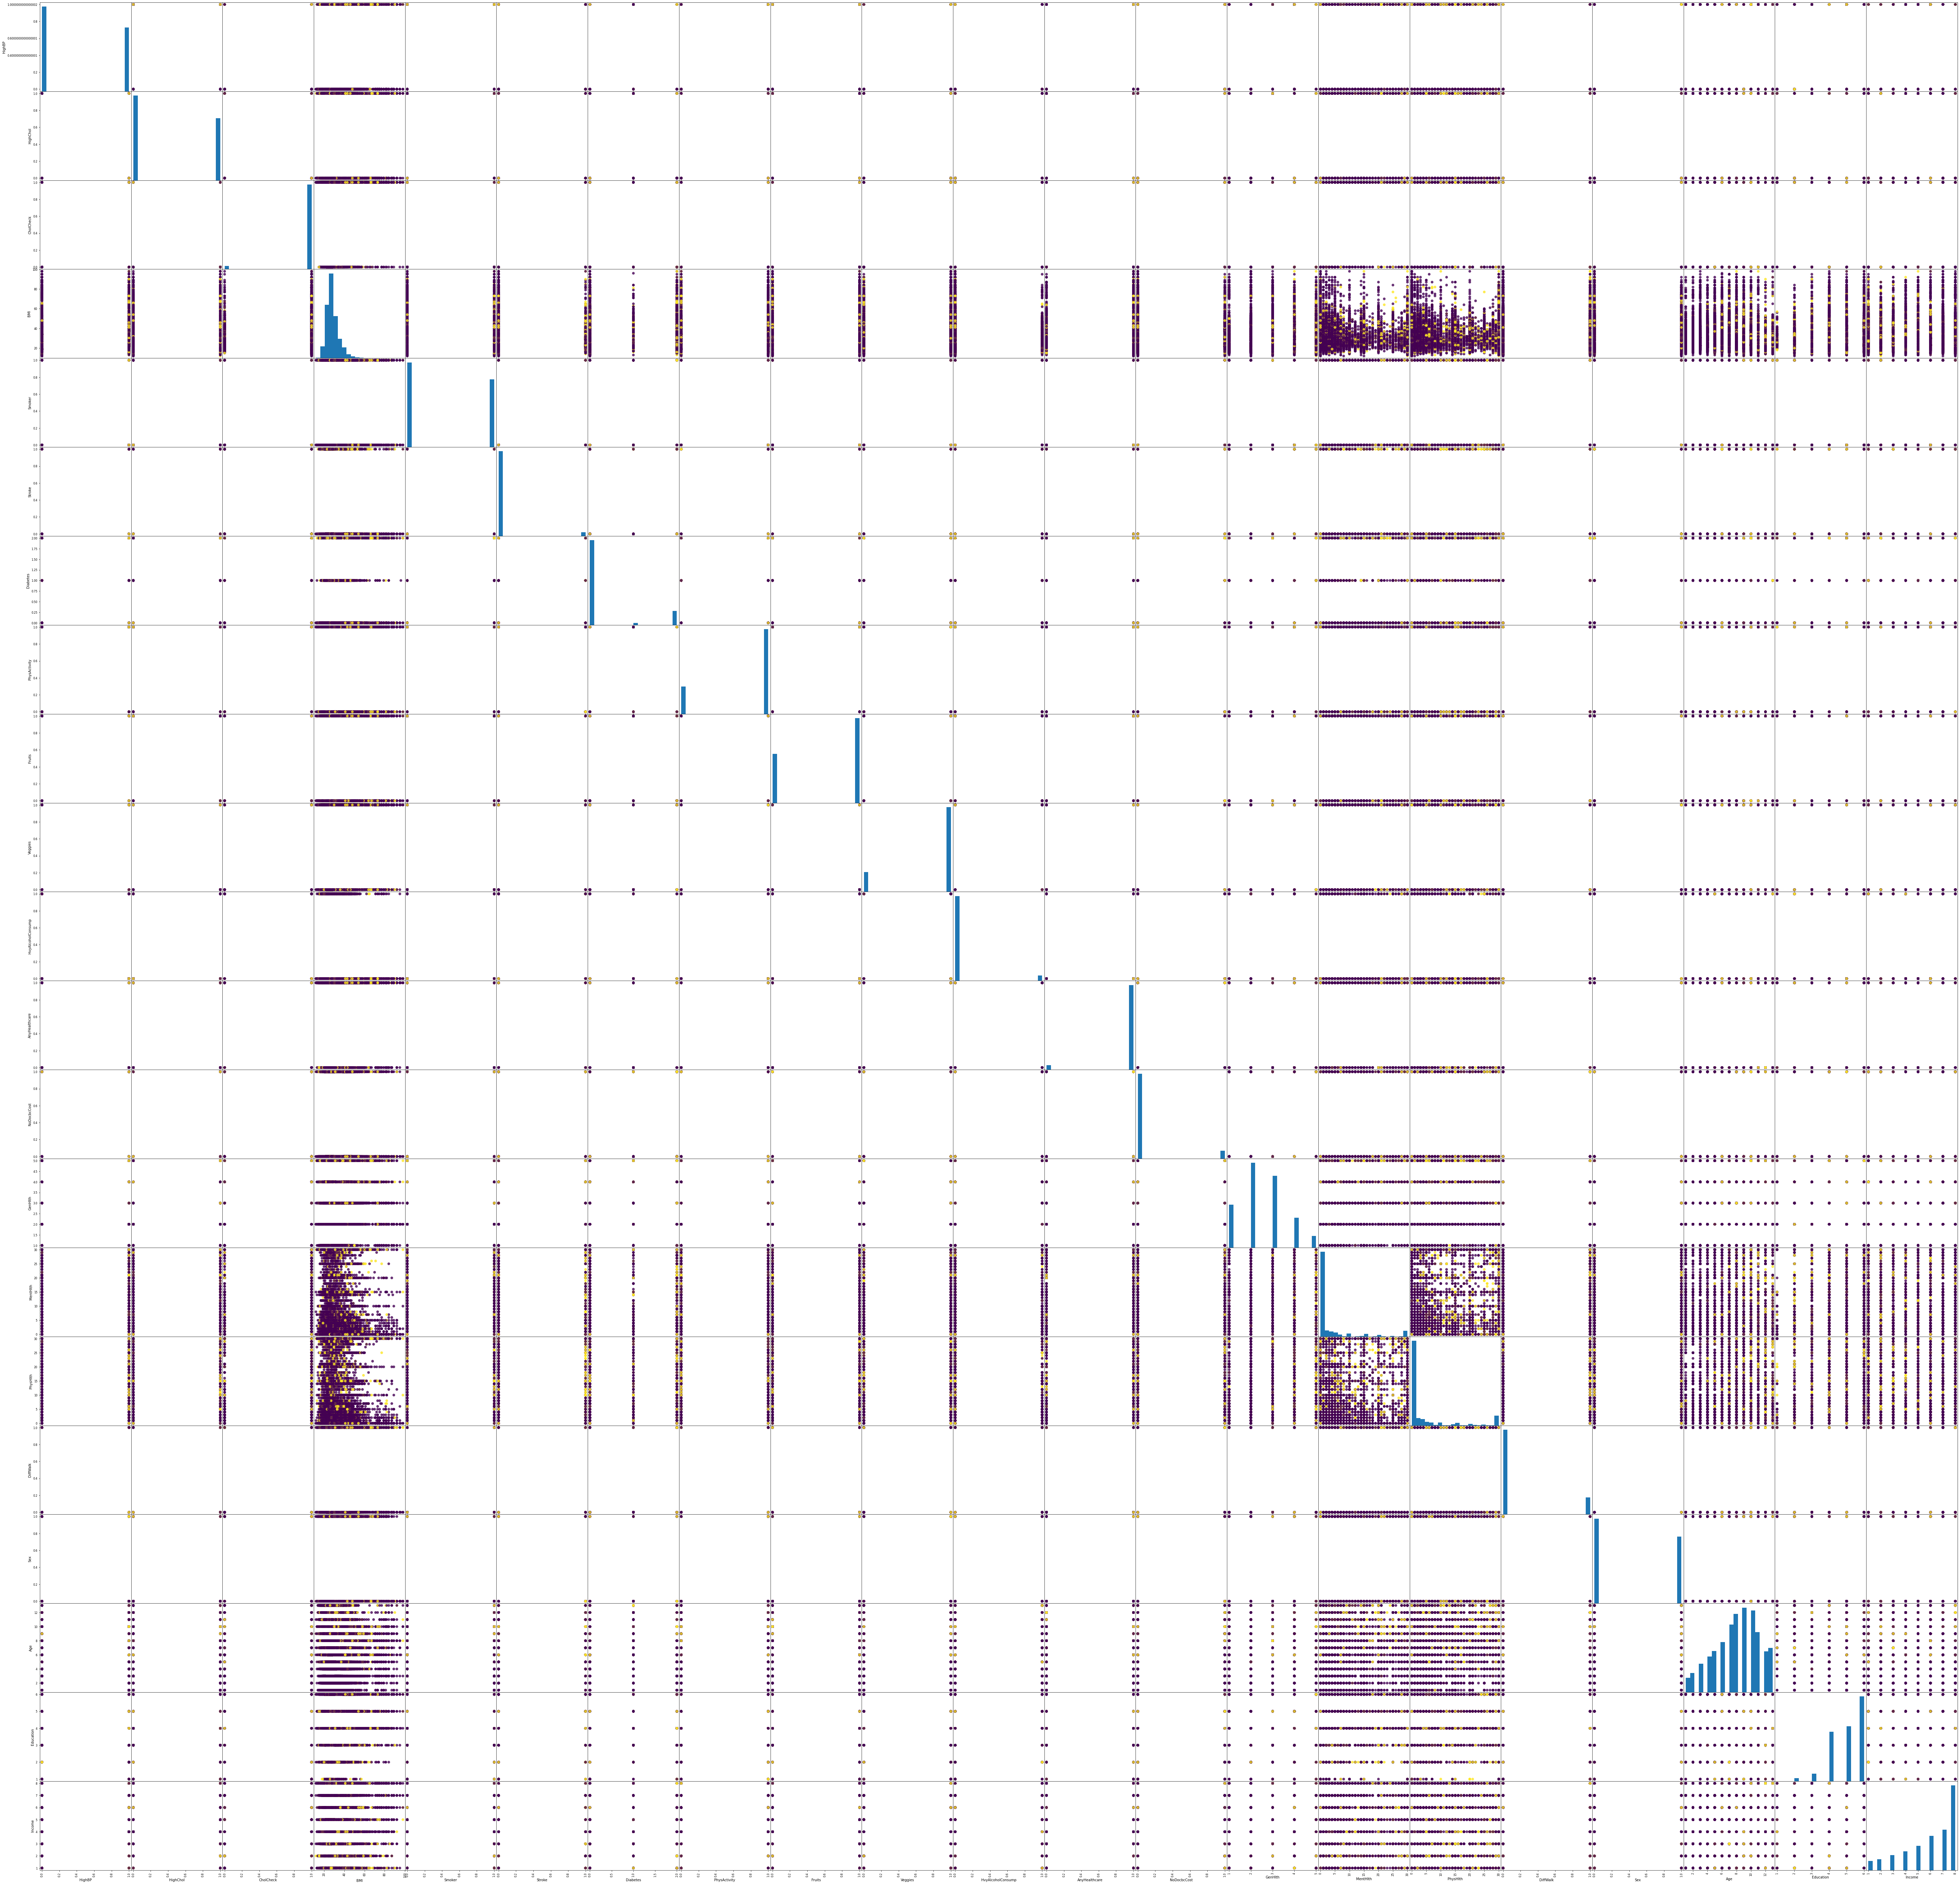

In [8]:
grr = scatter_matrix(data_fr,c=y_train,figsize=(1000,1000),marker = 'o',hist_kwds={'bins':20},s=60,alpha=0.8)